# Purpose

Of this notebook is to demonstrate some common usages of the `kulgap` package.

### Define a Collection

A collection is essentially is list of all of your timeseries data structured like:

In [1]:
import numpy as np

# import some data
control_obs_times = np.array([0, 4, 7, 11, 14, 18, 21])
control_obs_seqs = np.array([
    [186.98, 368.7, 488.45, 782.15, 924.55, 970.16, 1081.03],
    [267.6, 495.77, 628.39, 892.86, 984.88, 1096.8, 1314.03],
    [164.48, 265.19, 321.11, 429.37, 554.81, 602.29, 801.5],
    [201.21, 363.26, 443.48,660, 860.98, 961.62, 1005.79]
])

treatment_obs_times = np.array([0, 4, 7, 11, 14, 18, 21])
treatment_obs_seqs = np.array(
    [
        [118.82, 296.3, 465.59, 600.2, 482.71, 613.6, 408.73],
        [151.67, 264.68, 384.61, 370.35, 304.5, 311.43, 213.42],
        [127.3, 211.11, 270.17, 166.8, 87.16, 72.28, 54.18]
    ]
)

`control_obs_times` is the sequence of times at which measurements were taken for the control case. `control_obs_seqs` is the sequence**s** of the actual measurements taken at each individual time.

In [7]:
from kulgap.collection import Collection

control_collection = Collection("control", control_obs_times, control_obs_seqs)
treatment_collection = Collection("treatment", treatment_obs_times, treatment_obs_seqs)

INFO:kulgap.config:Normalizing data...
INFO:kulgap.config:Normalizing data...


### Calculate Metrics for the Collection

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt

These are the supported metric types:

In [10]:
from kulgap.metrics import Metrics
Metrics.TYPES

('KL_DIVERGENCE',
 'KL_P_VALUE',
 'MRECIST',
 'MRECIST_COUNTS',
 'ANGLE',
 'ANGLE_RELATIVE',
 'ANGLE_AVERAGE',
 'ANGLE_AVERAGE_RELATIVE',
 'AUC',
 'AUC_NORM',
 'AUC_GP',
 'DIRECTION',
 'CREDIBLE_INTERVALS',
 'PERCENT_CREDIBLE_INTERVALS',
 'RATES_LIST',
 'DELTA_LOG_LIKELIHOOD_H0_H1')

You need to pass into the Metrics the Collection on which you'd like to perform analysis on, and you're ready to calculate the metrics.

In [11]:
control_metrics = Metrics(collection=control_collection)
treatment_metrics = Metrics(collection=treatment_collection)

### KL Divergence

The main supported distance metric between two Gaussian processes.

In [12]:
treatment_metrics.kl_divergence(control_metrics)

INFO:kulgap.config:Currently no fit GP on treatment, fitting a GP
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
 /usr/local/lib/python3.6/site-packages/GPy/kern/src/rbf.py:51: RuntimeWarning:overflow encountered in square
INFO:kulgap.config:Currently no fit GP on control, fitting a GP
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 24.679507527412888
Optimization restart 2/7, f = 32.576115376221665
Optimization restart 3/7, f = 32.57611090980552
Optimization restart 4/7, f = 32.576115376233524
Optimization restart 5/7, f = 24.67950752711931
Optimization restart 6/7, f = 24.67950752730764
Optimization restart 7/7, f = 32.576115376215164


INFO:kulgap.config:Calculating the KL Divergence between treatment and control


Optimization restart 1/7, f = -9.145489191420344
Optimization restart 2/7, f = -9.145489191428956
Optimization restart 3/7, f = 6.877800515901919
Optimization restart 4/7, f = -9.145489191393034
Optimization restart 5/7, f = 6.877801178673369
Optimization restart 6/7, f = 6.8777996980477365
Optimization restart 7/7, f = -9.145489191287687


INFO:kulgap.config:Calculated KL divergence is: 28.260223


28.260222824084451

 /usr/local/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


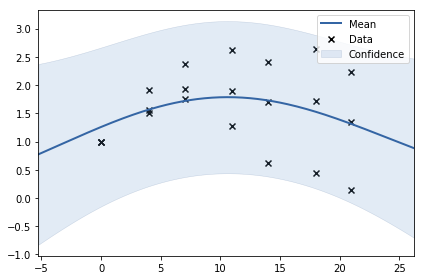

In [13]:
treatment_metrics.fit_gp.plot()

In [ ]:
control_metrics.kl_divergence(treatment_metrics)

Of course, KL divergence is not symmetric.

In [ ]:
control_metrics.fit_gp.plot()

### Jensen Shannon Divergence

The symmetric version of KL divergence.

### P value for the observed KL divergence

In [ ]:
treatment_metrics.kl_p_value(control_metrics)

### Angles

A line of best fit, fit using ordinary least squares.

### AUC

Area under the curve metric

### MRECIST (Modified Response Evaluation Criteria in Solid Tumors)

Because this package was built for comparing tumour growths in patient-derived xenografts, we natively provide this metric.

### Credible Intervals

And all of the derivatives from credible intervals...

### GP Derivatives